In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
## ml models
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

# model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [94]:
df = pd.read_csv('train.csv')

#### Map text label to a scale

In [95]:
# map kitchan Quality to a scale
scale_kitchenQual = {    'Fa': 0,    'TA': 1,    'Gd': 2,    'Ex': 3}
df['KitchenQual'] =df['KitchenQual'].apply(lambda x: scale_kitchenQual[x]) 
df['LotFrontage'].fillna(0, inplace=True)

#### Correlation Visualization

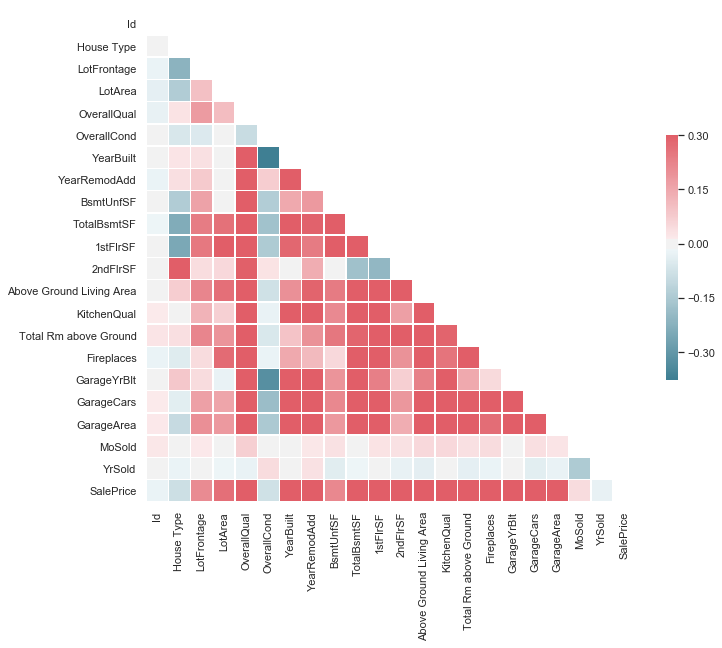

In [97]:
sns.set(style="white")
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [98]:
# Simplify the problem by considering numerical features with high correlations only
sub_df = df[['LotArea', 'LotFrontage', 'OverallQual', 'YearBuilt','Total Rm above Ground', 'KitchenQual', 'Fireplaces', 'SalePrice']]
# drop data with null values
sub_df = sub_df.dropna()

#### Normalization

In [99]:
# normalize data within (0,1)
scaler = MinMaxScaler(feature_range=(0, 1))
norm_df = pd.DataFrame(data=scaler.fit_transform(sub_df), columns=sub_df.columns)

In [100]:
# X = preprocessing.normalize(sub_df[['LotArea', 'LotFrontage', 'OverallQual', 'YearBuilt', 'KitchenQual', 'Fireplaces']])
X = norm_df[['LotArea', 'LotFrontage', 'OverallQual', 'YearBuilt', 'Total Rm above Ground', 'KitchenQual', 'Fireplaces']]
y = norm_df[['SalePrice']]

Text(0.5, 1.0, 'After Normalization')

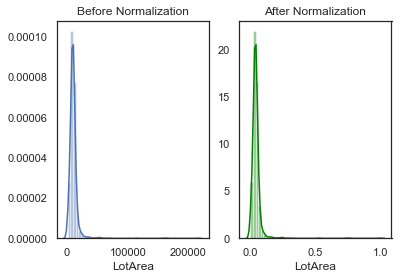

In [101]:
# Distribution before normalization
plt.subplot(121)
sns.distplot(sub_df['LotArea'])
plt.title("Before Normalization")
plt.subplot(122)
sns.distplot(norm_df['LotArea'], color='green')
plt.title("After Normalization")

In [102]:
train_X, test_X, train_y, test_y = train_test_split(X, y , test_size=0.4)

#### Linear Model

In [103]:
reg = LinearRegression().fit(train_X, train_y)
test_result = pd.DataFrame(data=reg.predict(test_X), columns=['pred'])
test_result['actual'] = test_y

R^2 coefficient:  0.7580355727698067


Text(0, 0.5, 'Prediction')

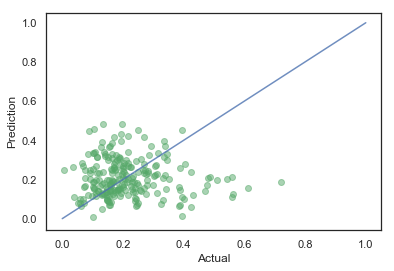

In [104]:
print("R^2 coefficient: ", reg.score(test_X, test_y))
plt.plot([0,1], [0,1], alpha=0.8)
plt.scatter(test_result['actual'], test_result['pred'] , c="g", alpha=0.5, label="testing dataset")
plt.xlabel("Actual")
plt.ylabel("Prediction")

#### Non-linear Models

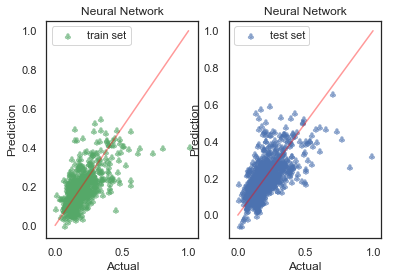

Testing Dataset Mean Square Error: 0.008414091694675248
Training Dataset Mean Absolute Error: 0.008630846586696168


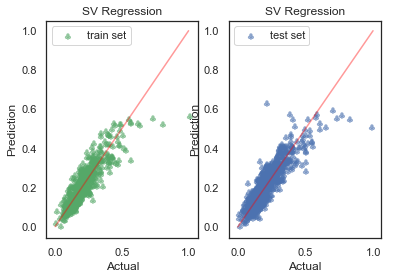

Testing Dataset Mean Square Error: 0.0028115411758768923
Training Dataset Mean Absolute Error: 0.0028327055418784423


In [107]:
for model, name in [(MLPRegressor(hidden_layer_sizes=8), "Neural Network"), (svm.SVR(C=10), "SV Regression")]:
    model.fit(train_X, train_y)
    pred_y = model.predict(test_X)
    pred_train_y = model.predict(train_X)

    # print ("r2_score Error:" , r2_score(train_y, pred_train_y))

    plt.subplot(121)
    plt.title(name)
    plt.plot([0,1], [0,1], alpha=0.4, color='red')
    plt.scatter(test_y, pred_y , c="g", alpha=0.5, marker=r'$\clubsuit$', label="train set")
    plt.xlabel("Actual")
    plt.ylabel("Prediction")
    plt.legend(loc='upper left')

    plt.subplot(122)
    plt.title(name)
    plt.plot([0,1], [0,1], alpha=0.4, color='red')
    plt.scatter(train_y,pred_train_y , c="b", alpha=0.5, marker=r'$\clubsuit$', label="test set")
    plt.xlabel("Actual")
    plt.ylabel("Prediction")
    plt.legend(loc='upper left')

    plt.show()
    print ("Testing Dataset Mean Square Error:" , mean_squared_error(test_y, pred_y))
    print ("Training Dataset Mean Absolute Error:" , mean_squared_error(train_y, pred_train_y))